College Prediction Project

In [2]:
import numpy as np
import pandas as pd

# Data Cleaning
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Model Training
from sklearn.model_selection import train_test_split   
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [3]:
# Paths to your datasets
file1 = "CSV_Dataset/CAP_Round1_Full.csv"
file2 = "CSV_Dataset/CAP_Round2_Full.csv"
file3 = "CSV_Dataset/CAP_Round3_Full.csv"

# Load datasets
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['branch', 'marks', 'caste', 'Cap_round_no', 'status', 'college_name'], dtype='object')
Index(['branch', 'marks', 'caste', 'Cap_round_no', 'status', 'college_name'], dtype='object')
Index(['branch', 'marks', 'caste', 'Cap_round_no', 'status', 'college_name'], dtype='object')


In [4]:
# Target column
target_column = "college_name"

# Combine features and labels
features = pd.concat([df1.drop(columns=[target_column]), df2.drop(columns=[target_column]), df3.drop(columns=[target_column])], axis=0)
labels = pd.concat([df1[target_column], df2[target_column], df3[target_column]], axis=0)

In [5]:
# Combine features
X = features
print("X Columns :", X.columns)

# Combine target
y = labels
print("y Shape :", y.shape)

print(X.shape, y.shape)

X Columns : Index(['branch', 'marks', 'caste', 'Cap_round_no', 'status'], dtype='object')
y Shape : (8937,)
(8937, 5) (8937,)


In [6]:
X.sample(5)

,branch,marks,caste,Cap_round_no,status
1925,NaN,NaN,AND,3,Government
1720,Electronics and Telecommunication Engg,66.2,NLOPENH,1,Un-Aided
972,Computer Science and Engineering,65.4,TGSTO,3,Un-Aided
2252,Computer Science and Engineering,87.6,TLOBCO,1,Un-Aided
2957,Interior Design,NaN,SSC,1,Un-Aided


In [7]:
y.sample(5)

98                     Government Polytechnic, Murtijapur
1789                        Government Polytechnic, Jalna
476                      Government Polytechnic, Amravati
1938    PURANMAL  LAHOTI GOVERNMENT INSTITUTE OF ENGIN...
965     Padmashri Dr. V.B.  Kolte College of Engineeri...
Name: college_name, dtype: object

Data Cleaning

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8937 entries, 0 to 2639
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   branch        8496 non-null   object 
 1   marks         5638 non-null   float64
 2   caste         8937 non-null   object 
 3   Cap_round_no  8937 non-null   int64  
 4   status        8924 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 418.9+ KB


In [9]:
X.head(10)

,branch,marks,caste,Cap_round_no,status
0,NaN,NaN,GOVERNMENT,1,NaN
1,NaN,NaN,MAHARASHTRA,1,NaN
2,NaN,NaN,CAP,1,NaN
3,NaN,NaN,SSC,1,NaN
4,Civil Engineering,80.8,NGOPENH,1,Government
5,Civil Engineering,80.8,NGSCH,1,Government
6,Civil Engineering,80.8,NGSTH,1,Government
7,Civil Engineering,80.8,NGNTAH,1,Government
8,Civil Engineering,80.8,NGNTBH,1,Government
9,Civil Engineering,80.8,NGOBCH,1,Government


In [10]:
# missing values
X.isnull().sum()

branch           441
marks           3299
caste              0
Cap_round_no       0
status            13
dtype: int64

In [11]:
X['Cap_round_no'] = X['Cap_round_no'].fillna(method='ffill')
X['status'] = X['status'].fillna(method='ffill')
X['branch'] = X['branch'].fillna(method='ffill')

C:\Users\premv\AppData\Local\Temp\ipykernel_12572\1583891356.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X['Cap_round_no'] = X['Cap_round_no'].fillna(method='ffill')
C:\Users\premv\AppData\Local\Temp\ipykernel_12572\1583891356.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X['status'] = X['status'].fillna(method='ffill')
C:\Users\premv\AppData\Local\Temp\ipykernel_12572\1583891356.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X['branch'] = X['branch'].fillna(method='ffill')


In [12]:
X.isnull().sum()

branch             4
marks           3299
caste              0
Cap_round_no       0
status             4
dtype: int64

In [13]:
# Interpolation : Fill missing values by looking at neighboring known values.

X_interp = X.copy() #If By any reason you required original data print(X_interp)
X['marks'].interpolate(method='linear', inplace=True)
print("Before filling missing values:\n", X_interp['marks'].isnull().sum())
print("After filling missing values:\n", X['marks'].isnull().sum())

Before filling missing values:
 3299
After filling missing values:
 4


C:\Users\premv\AppData\Local\Temp\ipykernel_12572\3733204862.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['marks'].interpolate(method='linear', inplace=True)


In [14]:
X.isnull().sum()

branch          4
marks           4
caste           0
Cap_round_no    0
status          4
dtype: int64

In [15]:
print(len(X), len(y))

8937 8937


Drop rows

In [16]:
# Combine features and target into one DataFrame while Droping features and labels are remain equal
df_all = X.copy()
df_all['college_name'] = y 
cols_to_check = ['branch', 'marks', 'caste', 'Cap_round_no', 'status', 'college_name']

# Drop all rows with NaN in these columns
df_all = df_all.dropna(subset=cols_to_check)
print('Shape after dropping rows with NaN in selected columns:', df_all.shape)

# Reset index to avoid misalignment
df_all = df_all.reset_index(drop=True)

# Separate features and target again
X = df_all.drop(columns=['college_name'])
y = df_all['college_name']

print("To Cross-Check Data Not Mispatched :",len(X), len(y))

Shape after dropping rows with NaN in selected columns: (8924, 6)
To Cross-Check Data Not Mispatched : 8924 8924


In [17]:
print("X Missing Value :",X.isnull().sum())
print("y Missing Value :",y.isnull().sum())

X Missing Value : branch          0
marks           0
caste           0
Cap_round_no    0
status          0
dtype: int64
y Missing Value : 0


In [18]:
print("X Shape :",X.shape)
print("y Shape :",y.shape)

X Shape : (8924, 5)
y Shape : (8924,)


In [19]:
X.sample

<bound method NDFrame.sample of                       branch  marks    caste  Cap_round_no      status
0          Civil Engineering   80.8  NGOPENH             1  Government
1          Civil Engineering   80.8    NGSCH             1  Government
2          Civil Engineering   80.8    NGSTH             1  Government
3          Civil Engineering   80.8   NGNTAH             1  Government
4          Civil Engineering   80.8   NGNTBH             1  Government
...                      ...    ...      ...           ...         ...
8919  Information Technology   75.4    NGSCO             3    Un-Aided
8920  Information Technology   75.4   NGOBCO             3    Un-Aided
8921  Information Technology   75.4  NLOPENO             3    Un-Aided
8922  Information Technology   87.2      EWS             3    Un-Aided
8923  Information Technology   87.2     DEFR             3    Un-Aided

[8924 rows x 5 columns]>

EDA

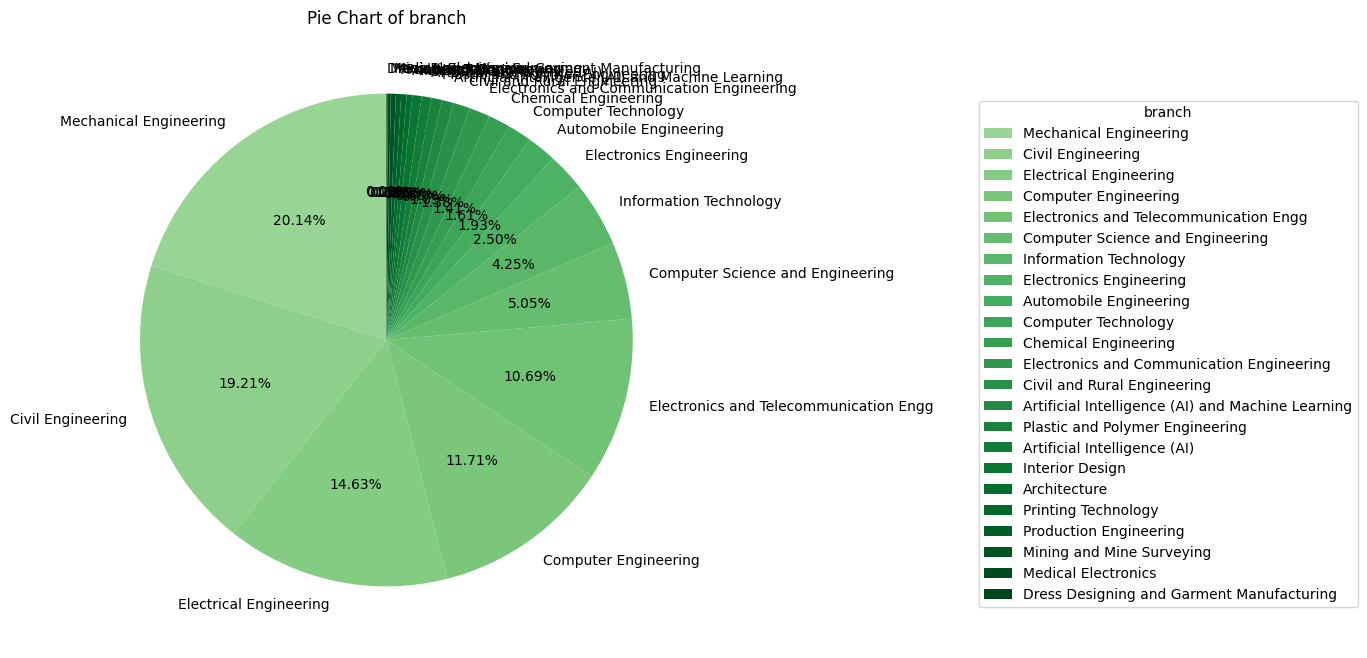

In [20]:
# Simple pie chart for a categorical column in X with green color shades and legend
col = 'branch'  # or any categorical column you want
counts = X[col].value_counts()
colors = plt.cm.Greens(np.linspace(0.4, 1, len(counts)))
plt.figure(figsize=(8,8))
plt.pie(counts, labels=counts.index, autopct="%0.2f%%", startangle=90, colors=colors)
plt.title(f'Pie Chart of {col}')
plt.legend(title=col, bbox_to_anchor=(1.45, 0.9), loc='upper left')
plt.show()

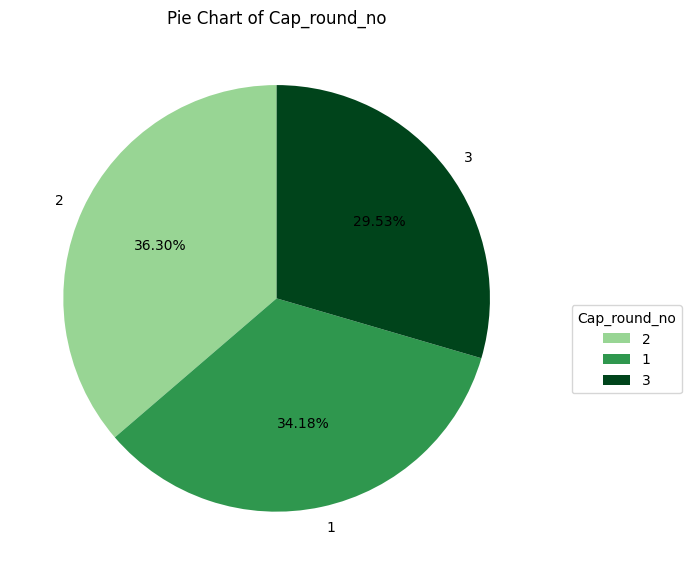

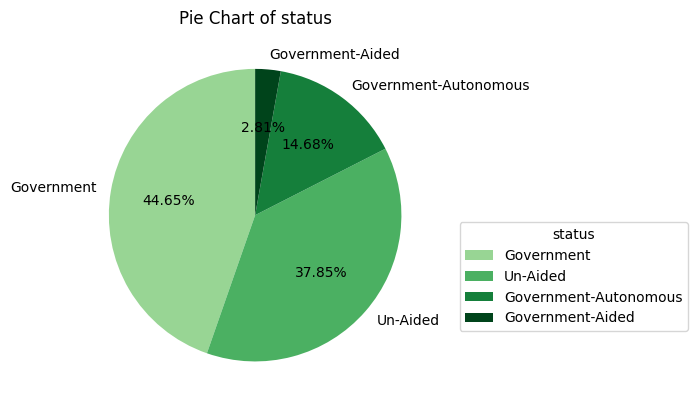

In [21]:
# Pie charts for selected columns in X with green theme, only if unique values < 10
cols_to_plot = ['Cap_round_no', 'status']
for col in cols_to_plot:
    if col in X.columns and X[col].nunique() <= 10:
        counts = X[col].value_counts()
        colors = plt.cm.Greens(np.linspace(0.4, 1, len(counts)))
        plt.figure(figsize=(7,7))
        plt.pie(counts, labels=counts.index, autopct="%0.2f%%", startangle=90, colors=colors)
        plt.title(f'Pie Chart of {col}')
        plt.legend(title=col, bbox_to_anchor=(1.04, 0.5), loc='upper left')
        plt.tight_layout()
        plt.show()

C:\Users\premv\AppData\Local\Temp\ipykernel_12572\174206504.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


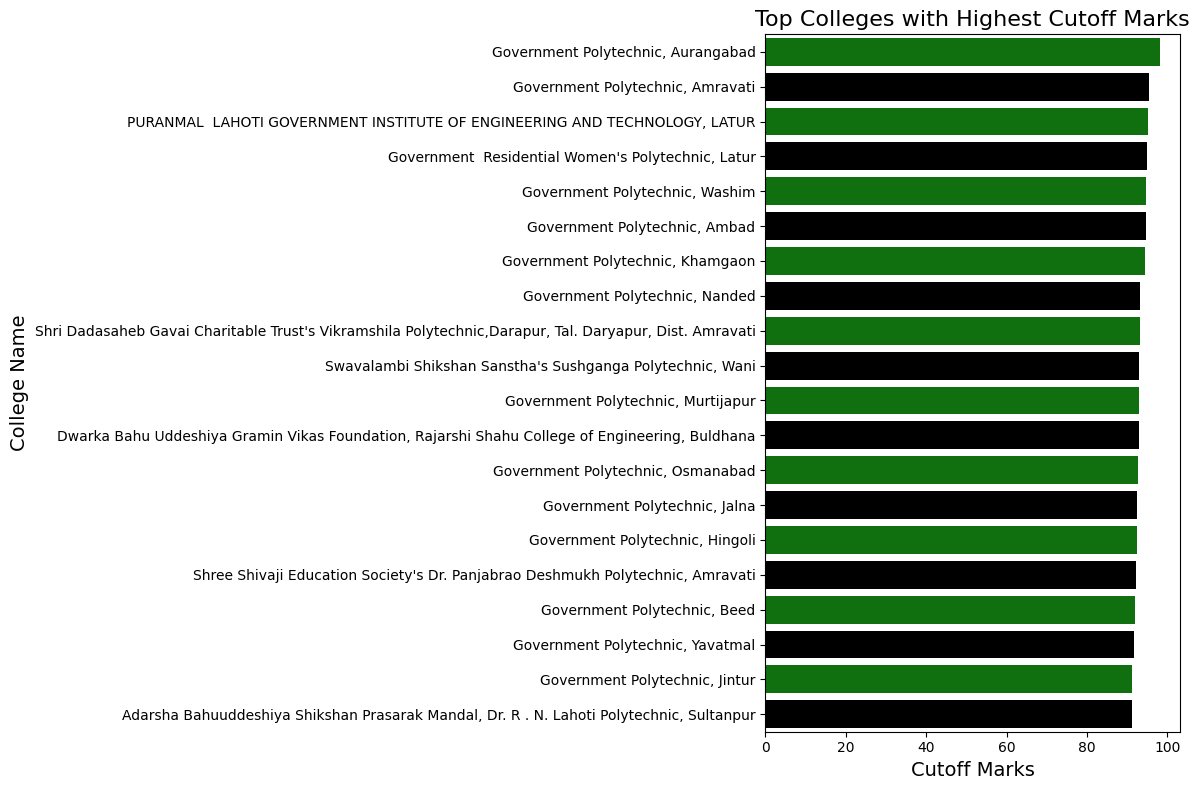

In [22]:
# # After all cleaning and dropping duplicates
# X = X.reset_index(drop=True)
# y = y.reset_index(drop=True)

# Combine features and labels for EDA
df_all = X.copy()
df_all['college_name'] = y  # now this will work

# Now you can calculate top college cutoffs
college_cutoffs = (
    df_all.groupby('college_name')['marks']
    .max()
    .reset_index()
    .sort_values(by='marks', ascending=False)
)

top_colleges = college_cutoffs.head(20)

# Plot horizontal bar chart
plt.figure(figsize=(12,8))
sns.barplot(
    data=top_colleges, 
    x='marks', 
    y='college_name',
    palette=['green' if i % 2 == 0 else 'black' for i in range(len(top_colleges))]
)

plt.title("Top Colleges with Highest Cutoff Marks", fontsize=16)
plt.xlabel("Cutoff Marks", fontsize=14)
plt.ylabel("College Name", fontsize=14)
plt.tight_layout()
plt.show()

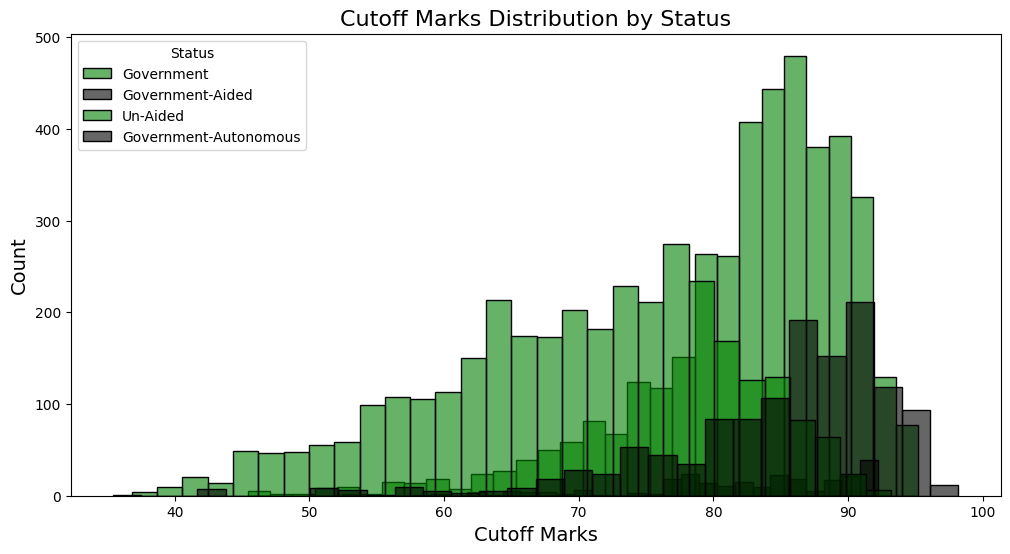

In [23]:
plt.figure(figsize=(12,6))

# Loop through each unique status and plot histogram
colors = ['green', 'black']  # first two categories
for i, status_val in enumerate(df_all['status'].unique()):
    sns.histplot(df_all[df_all['status'] == status_val]['marks'],
                 bins=30, color=colors[i % len(colors)], 
                 label=str(status_val), alpha=0.6)

plt.title("Cutoff Marks Distribution by Status", fontsize=16)
plt.xlabel("Cutoff Marks", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Status")
plt.show()


In [24]:
print(X.columns)

Index(['branch', 'marks', 'caste', 'Cap_round_no', 'status'], dtype='object')


Feacture Extraction

In [25]:
le = LabelEncoder()
y = le.fit_transform(y)
print("First 300 encoded college_name values:\n", y[:300])

# --- Encode categorical features in X ---
cat_cols = ['branch', 'caste', 'status']  # list of categorical columns
X_encoded = X.copy()  # create a copy to avoid modifying original

for col in cat_cols:
    le_col = LabelEncoder()
    X_encoded[col] = le_col.fit_transform(X_encoded[col])

print("\nSample of encoded features:")
print(X_encoded.head())


First 300 encoded college_name values:
 [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26
 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26
 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26
 26 26 26 26 26 26 26 26 26 26 26 26]

Sample of encoded features:
   branch  marks 

Model Building

In [26]:
print(X.columns)
print(y)

Index(['branch', 'marks', 'caste', 'Cap_round_no', 'status'], dtype='object')
[14 14 14 ... 20 20 20]


In [27]:
# Split into training and test sets (X and y must have same length now)
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(7139, 5) (1785, 5) (7139,) (1785,)


In [28]:
print(X_train.shape, Y_train.shape)

(7139, 5) (7139,)


In [29]:
model = RandomForestClassifier(random_state=42)

In [30]:
model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
#  Make predictions on the test data
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(Y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(Y_test, y_pred))
print("R-squared Score:", r2_score(Y_test, y_pred))
print("\nPredictions on Test Data:", y_pred)


Model Accuracy: 0.6151260504201681
Mean Squared Error (MSE): 61.48627450980392
R-squared Score: 0.26816121473107246

Predictions on Test Data: [ 9 24 26 ...  7 21 14]


In [32]:
# Show actual vs predicted values 
results = pd.DataFrame({
    'Actual': le.inverse_transform(Y_test),       # decode back to college names
    'Predicted': le.inverse_transform(y_pred)     # decode back
})

print("\nActual vs Predicted (first 4 rows):")
print(results.head(4)) 


Actual vs Predicted (first 4 rows):
                                              Actual  \
0                       Government Polytechnic, Beed   
1  Padmashri Dr. V.B.  Kolte College of Engineeri...   
2  Shree Shivaji Education Society's Dr. Panjabra...   
3                  Government Polytechnic , Achalpur   

                                           Predicted  
0                       Government Polytechnic, Beed  
1  Padmashri Dr. V.B.  Kolte College of Engineeri...  
2  Shree Shivaji Education Society's Dr. Panjabra...  
3                   Government Polytechnic, Yavatmal  


In [33]:
#  Make predictions on the train data
y_pred = model.predict(X_train)
print("\nModel Accuracy:", accuracy_score(Y_train, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(Y_train, y_pred))
print("R-squared Score:", r2_score(Y_train, y_pred))
print("\nPredictions on Train Data:", y_pred)


Model Accuracy: 0.9943969743661577
Mean Squared Error (MSE): 0.6020451043563524
R-squared Score: 0.9931636743846964

Predictions on Train Data: [ 7 17 33 ... 32 13 24]


In [34]:
# Show actual vs predicted values 
results = pd.DataFrame({
    'Actual': Y_train,
    'Predicted': y_pred
})

print("\nActual vs Predicted (first 4 rows):")
print(results.head(4)) 


Actual vs Predicted (first 4 rows):
   Actual  Predicted
0       7          7
1      17         17
2      33         33
3       2          2


Test with Example data & Create the model.pkl files

In [35]:
# ---------------- Step 1: store encoder ----------------
cat_cols = ['branch', 'caste', 'status']
encoders = {}
X_encoded = X.copy()
for col in cat_cols:
    le_col = LabelEncoder()
    X_encoded[col] = le_col.fit_transform(X_encoded[col])
    encoders[col] = le_col

Create model.pkl

In [36]:
# ---------------- step A: Save Model and Encoders ----------------
import pickle
import os

# Create models folder if it doesn't exist
if not os.path.exists("models"):
    os.makedirs("models")

# Save trained RandomForest model
with open("models/college_model.pkl", "wb") as f:
    pickle.dump(model, f)
print("✅ RandomForest model saved to models/college_model.pkl")

# Save LabelEncoder for target (college_name)
with open("models/label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)
print("✅ LabelEncoder for college_name saved to models/label_encoder.pkl")

# Save feature encoders (branch, caste, status)
with open("models/feature_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)
print("✅ Feature encoders saved to models/feature_encoders.pkl")


✅ RandomForest model saved to models/college_model.pkl
✅ LabelEncoder for college_name saved to models/label_encoder.pkl
✅ Feature encoders saved to models/feature_encoders.pkl


In [37]:
# ---------------- step B: Load model and encoders to check ----------------

# Load trained model
with open("models/college_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Load target encoder
with open("models/label_encoder.pkl", "rb") as f:
    loaded_le = pickle.load(f)

# Load feature encoders
with open("models/feature_encoders.pkl", "rb") as f:
    loaded_encoders = pickle.load(f)

print("✅ Loaded model and encoders successfully!")


✅ Loaded model and encoders successfully!


In [ ]:
# ---------------- Step 2: Take input and predict top 30 colleges ----------------

input_data = {
    'branch': 'Civil Engineering',
    'marks': 83.8,
    'caste': 'NGOPENH',
    'Cap_round_no': 2,
    'status': 'Government'
}

input_df = pd.DataFrame([input_data])

# Encode categorical columns safely
for col in cat_cols:
    if input_df[col].iloc[0] in encoders[col].classes_:
        input_df[col] = encoders[col].transform(input_df[col])
    else:
        input_df[col] = [0]  # fallback for unseen values

# Ensure same column order
input_df = input_df[X_train.columns]

# ---------------- Step 6: Predict Top-5 Colleges ----------------
probs = model.predict_proba(input_df)[0]
top5_idx = np.argsort(probs)[::-1][:5]  # top 5
top5_colleges = le.inverse_transform(model.classes_[top5_idx])
top5_probs = probs[top5_idx]

print("\n🎯 Top 5 Predicted Colleges:")
for i in range(5):
    print(f"{i+1}. {top5_colleges[i]} — {top5_probs[i]*100:.2f}%")


🎯 Top 5 Predicted Colleges:
1. Government Polytechnic, Murtijapur — 64.00%
2. Government Polytechnic, Washim — 22.00%
3. Government Polytechnic, Beed — 10.00%
4. Government Polytechnic, Yavatmal — 3.00%
5. Government Polytechnic, Khamgaon — 1.00%
